In [3]:
import os
import pickle
import matplotlib.pyplot as plt
from statistics import mean
import math
import cloudpickle
import gzip
import matplotlib as mpl

from math import log

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 9
rcParams.update({'figure.max_open_warning': 0,'font.size': 14,'axes.titlesize': 14,'axes.labelsize': 14,
                 'axes.grid':True,'xtick.direction': 'in','ytick.direction': 'in','ytick.right': True,
                 'xtick.top':True,'ytick.major.size': 10,'xtick.major.size': 10,'legend.fancybox': True,
                 'legend.markerscale': 0.8,'legend.handlelength': 5.0
                 #'axes.prop_cycle': cycler('color', ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']),                 
                 #'xtick.labelsize': 12,
                 #'ytick.labelsize': 12
                })

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)


In [5]:
dirname = '/home/furkan/data/tpc/led/'
hists={}
allArrays = np.array([])
for filename in sorted(os.listdir(dirname)):
    if '.pkl.gz' in filename:
            with gzip.open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
                '''
                for k in mydata.keys():
                    #if 'channel_132'==k:

                    if k in hists: 
                        #allArrays  = np.concatenate((hists[k], mydata[k]))
                         hists.update({k: np.concatenate((hists[k], mydata[k]))  })
                        #allArrays  = np.concatenate((hists[k], mydata[k]))
                    else: hists[k] = mydata[k]
                '''
                    #mydata = pickle.load(fin)
                    #np.concatenate((array2D_1, array2D_2))


EOFError: Compressed file ended before the end-of-stream marker was reached

In [6]:
mydata['channel_132']

array([[1548., 1545., 1552., ..., 1548., 1550., 1551.],
       [1549., 1551., 1554., ..., 1545., 1544., 1543.],
       [1546., 1549., 1549., ..., 1545., 1555., 1553.],
       ...,
       [1548., 1545., 1550., ..., 1549., 1544., 1546.],
       [1544., 1544., 1547., ..., 1546., 1549., 1550.],
       [1548., 1540., 1543., ..., 1548., 1545., 1543.]])

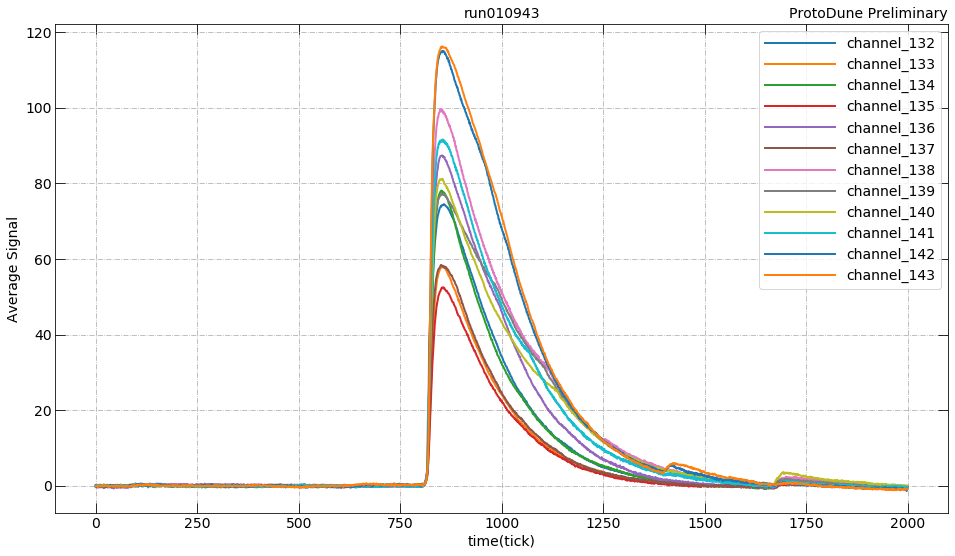

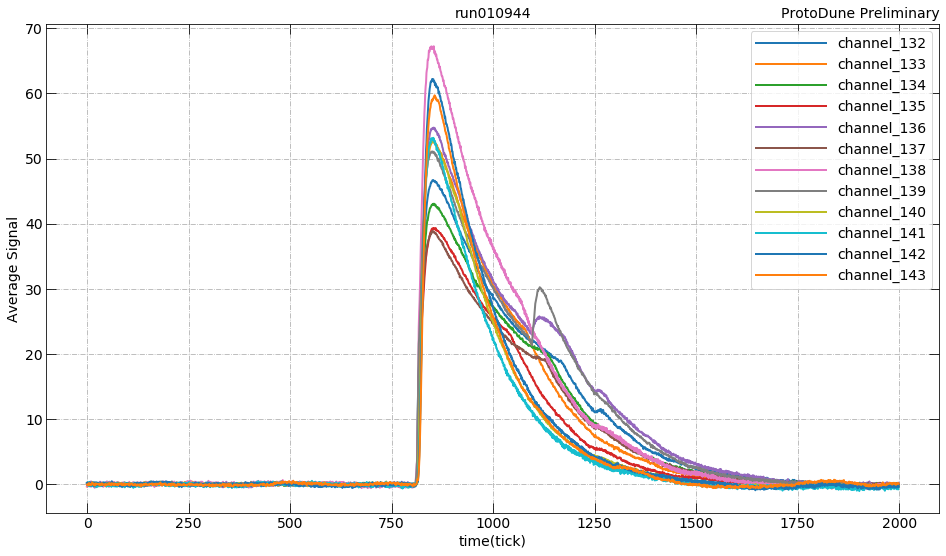

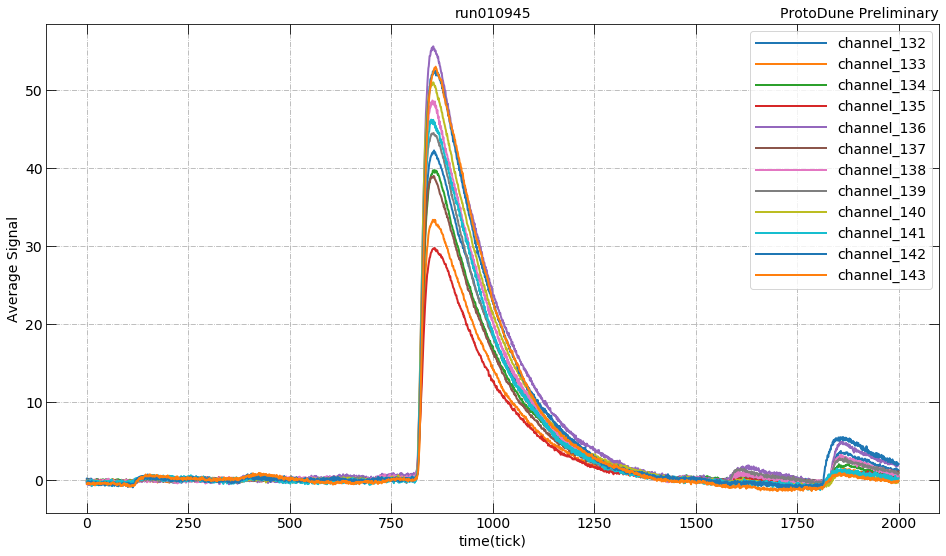

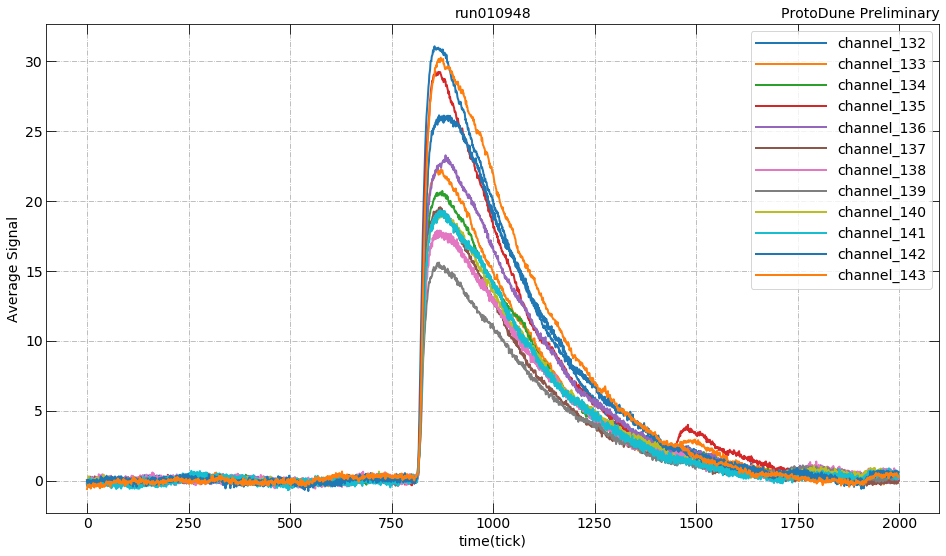

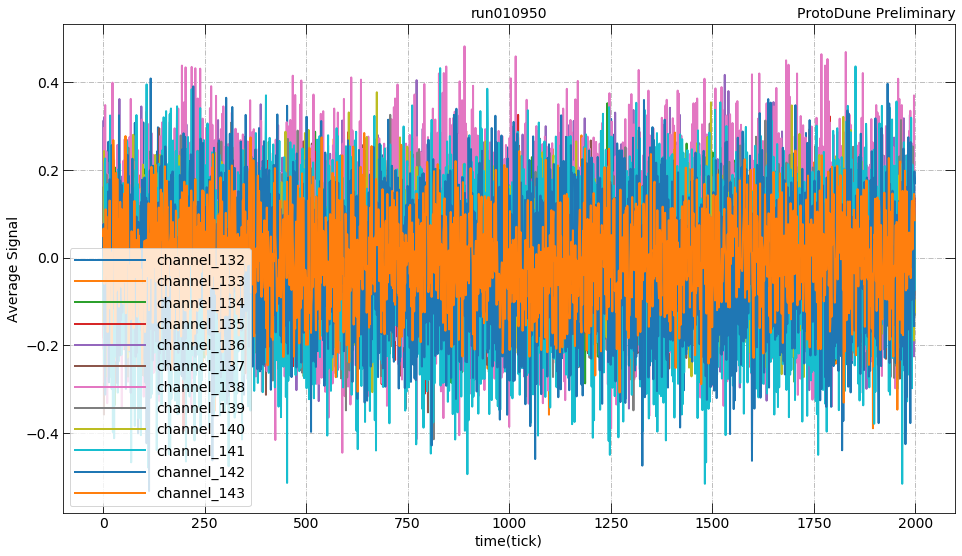

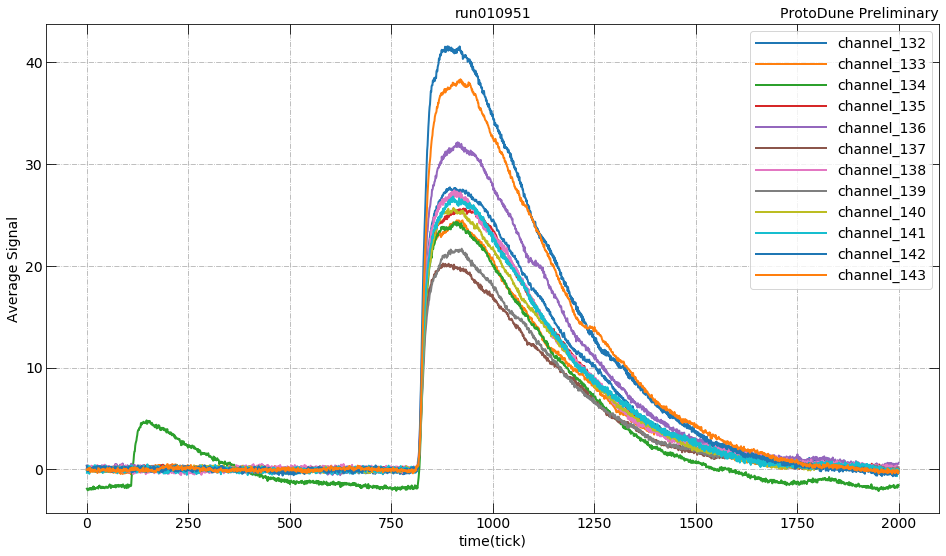

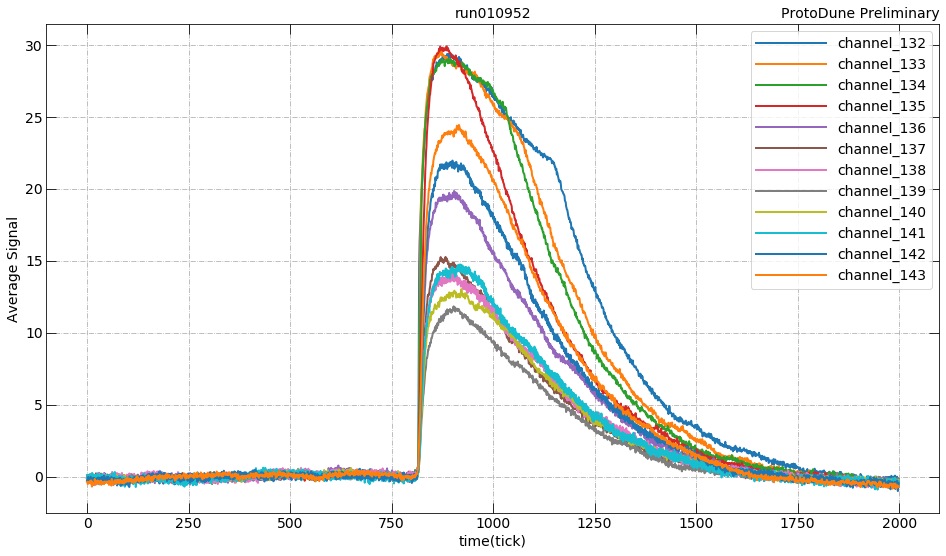

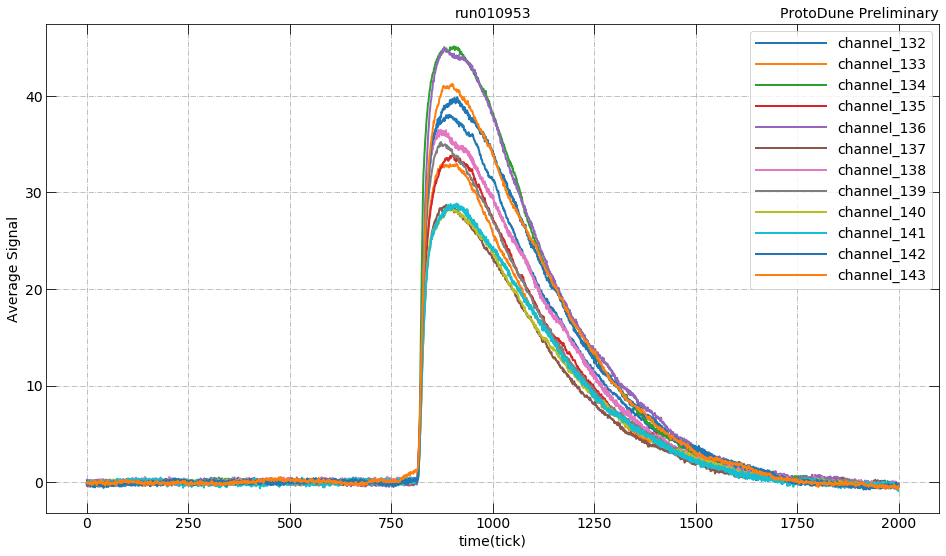

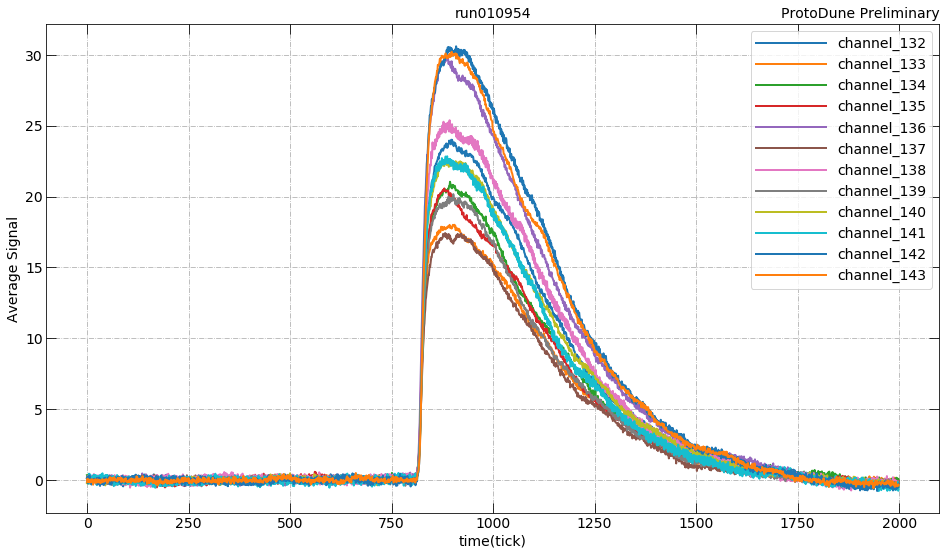

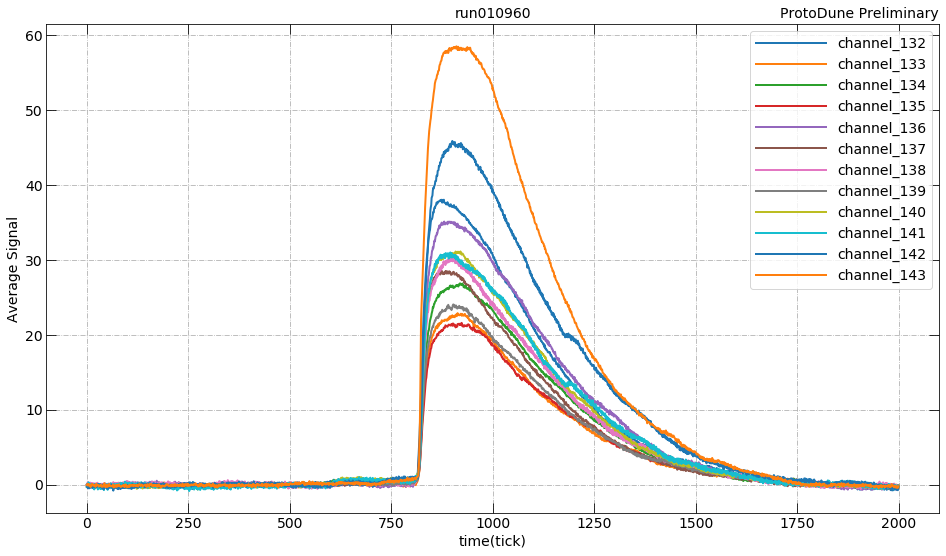

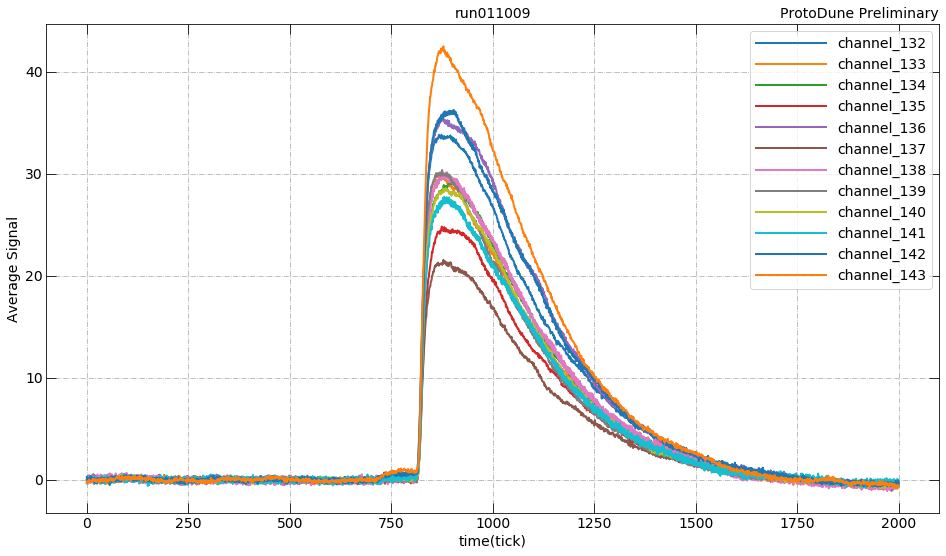

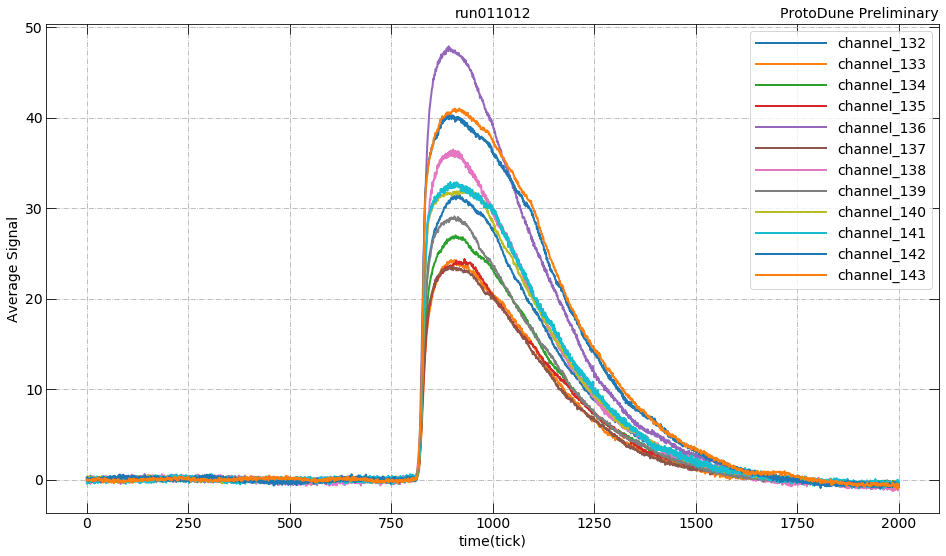

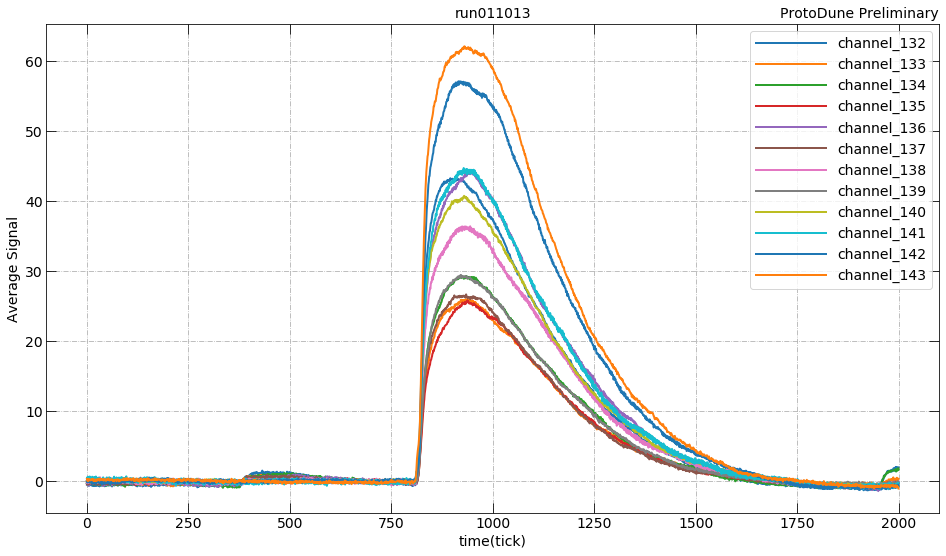

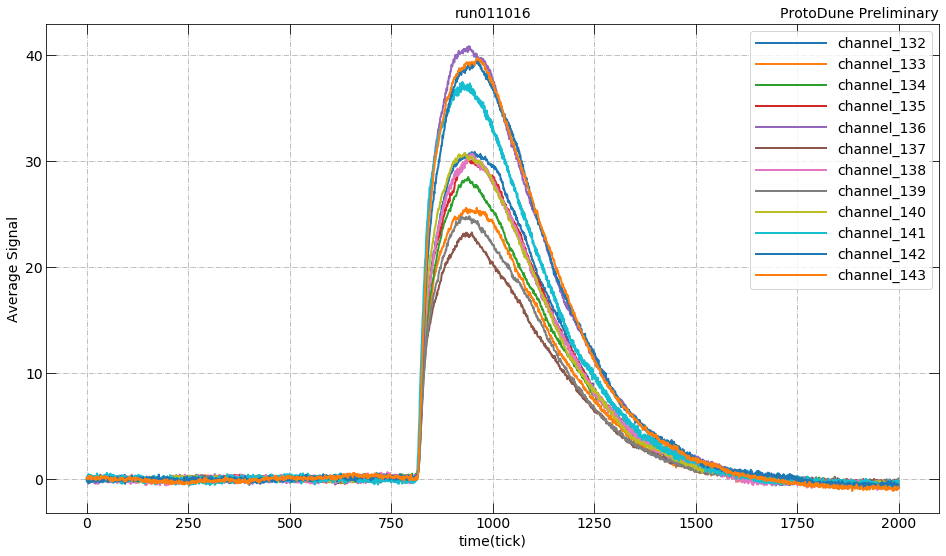

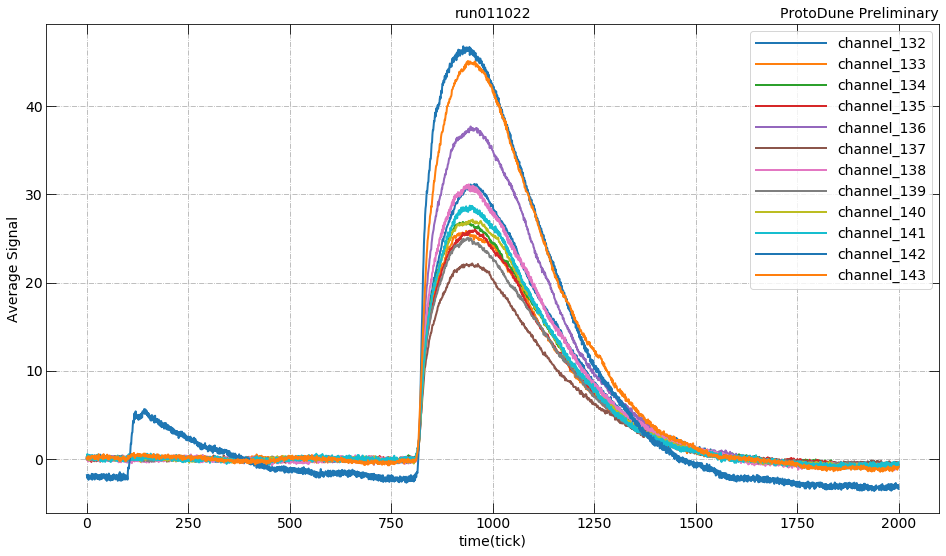

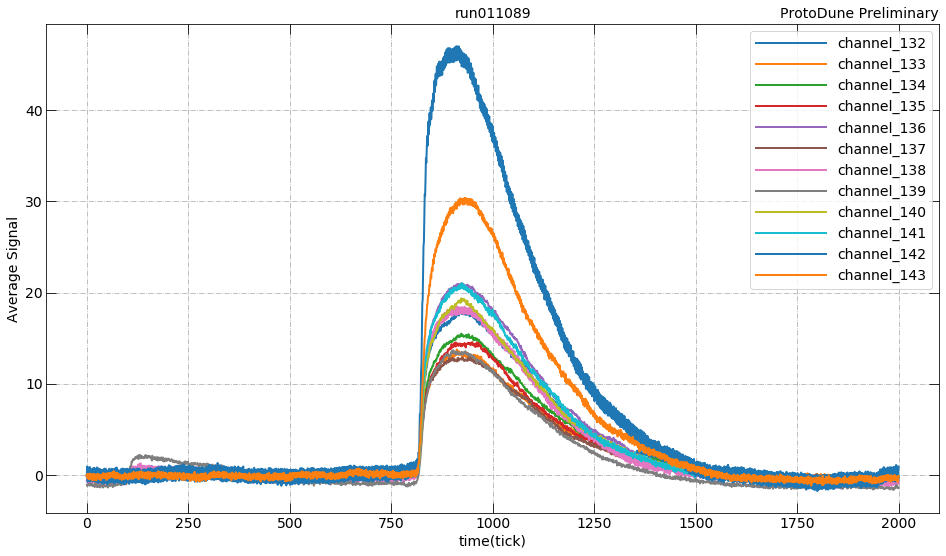

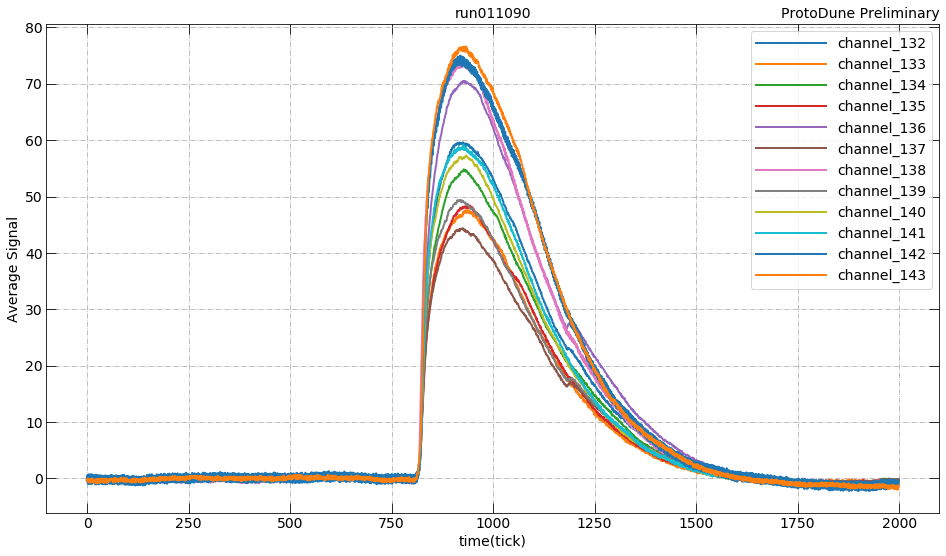

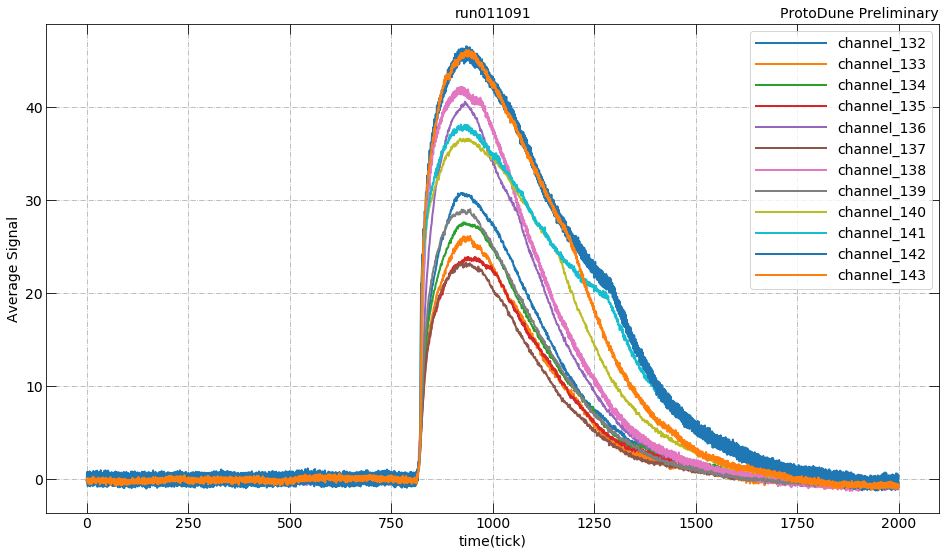

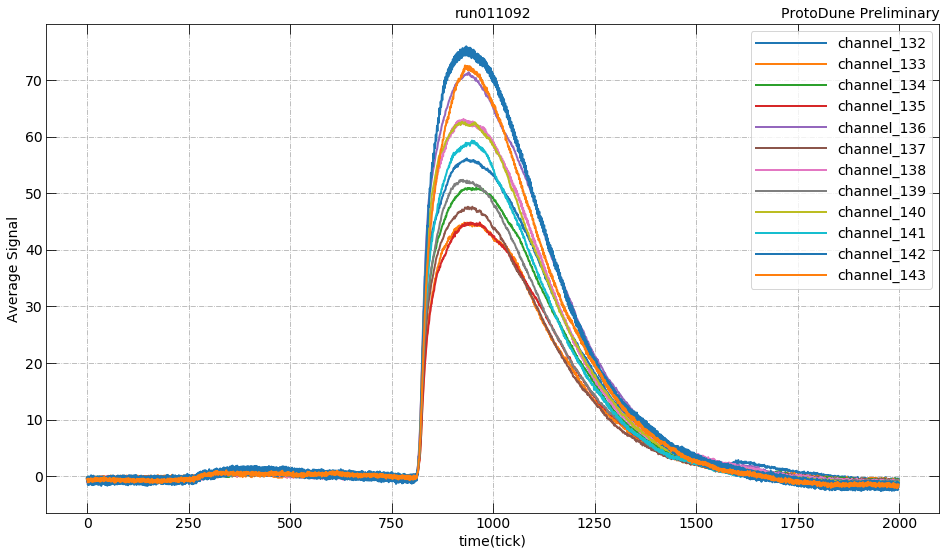

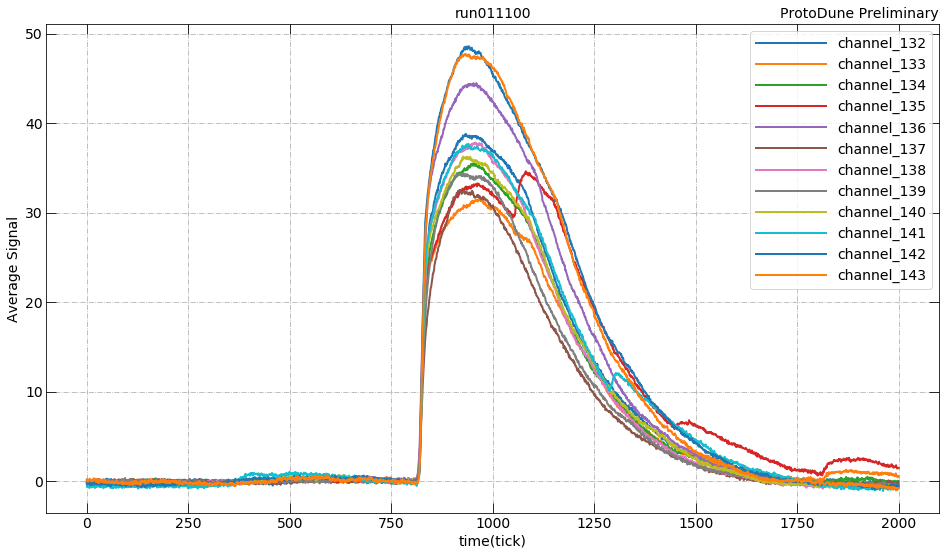

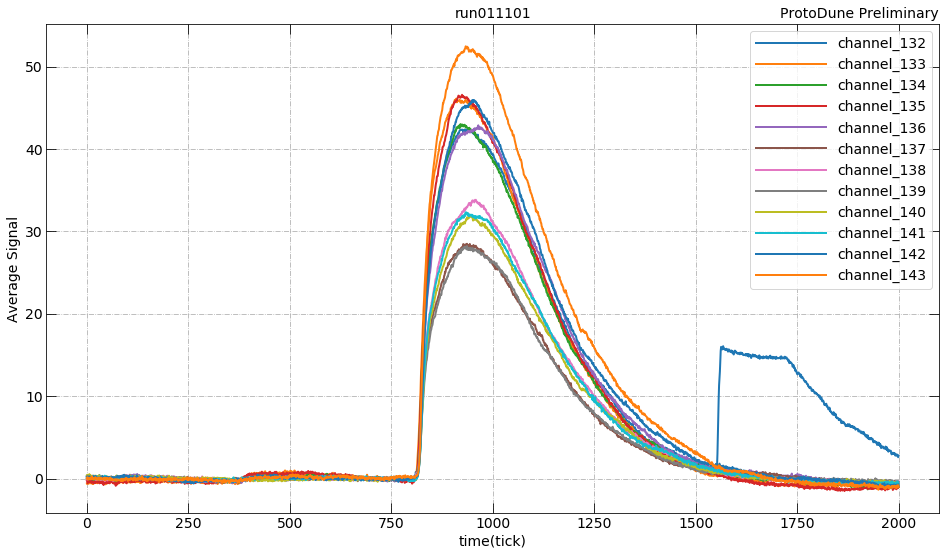

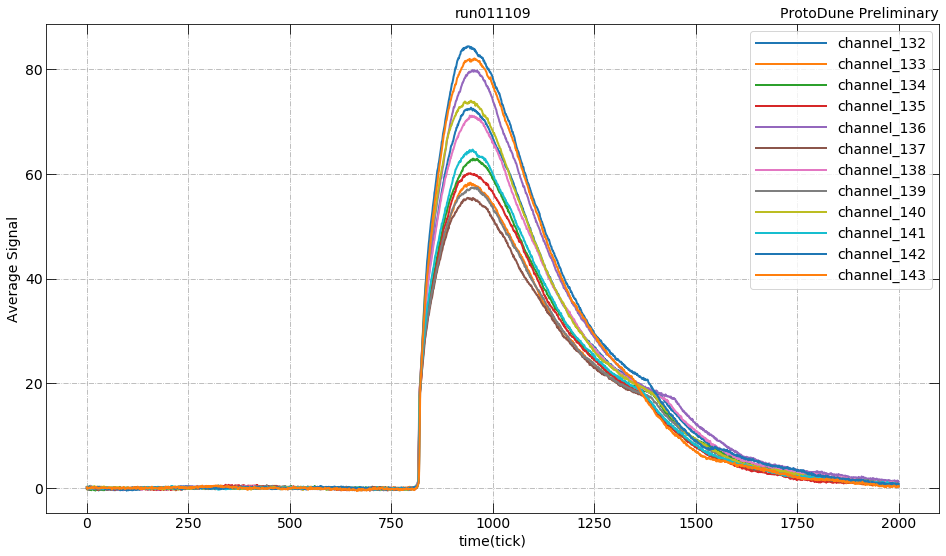

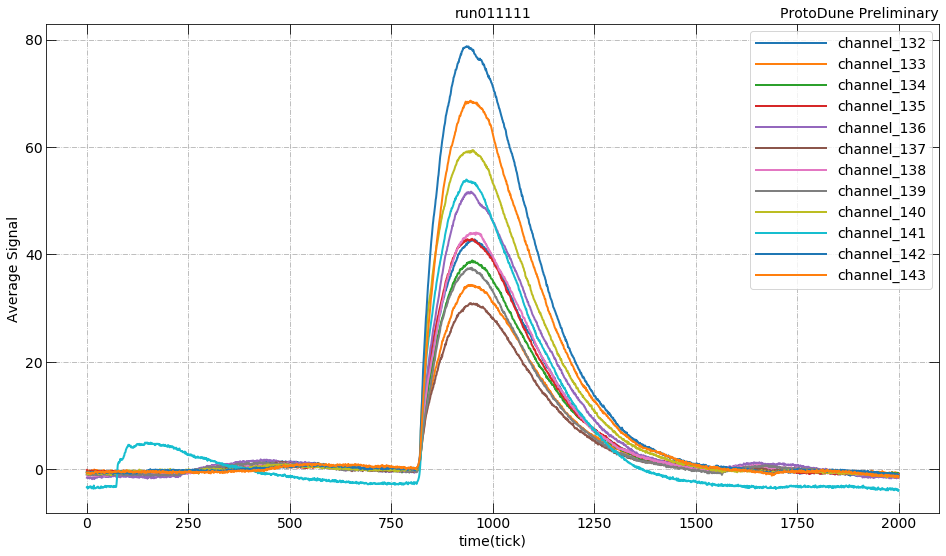

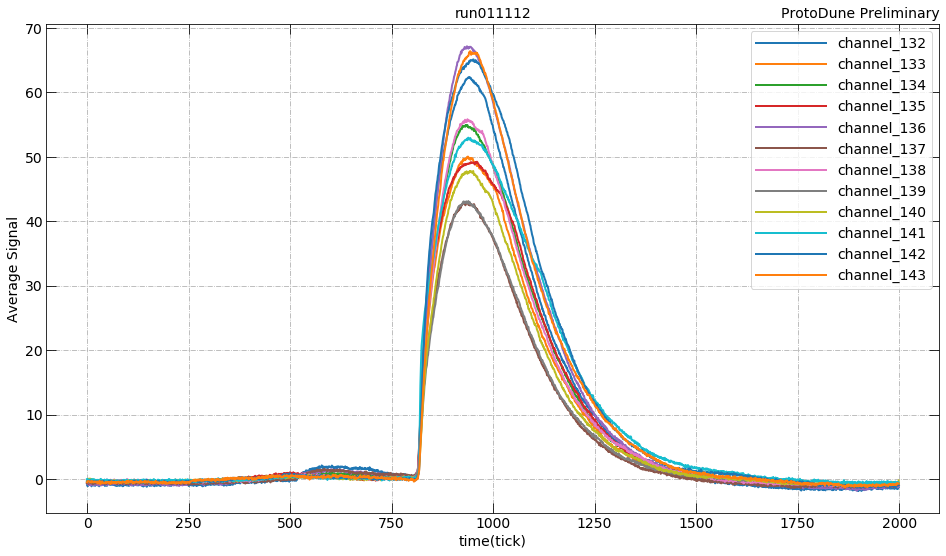

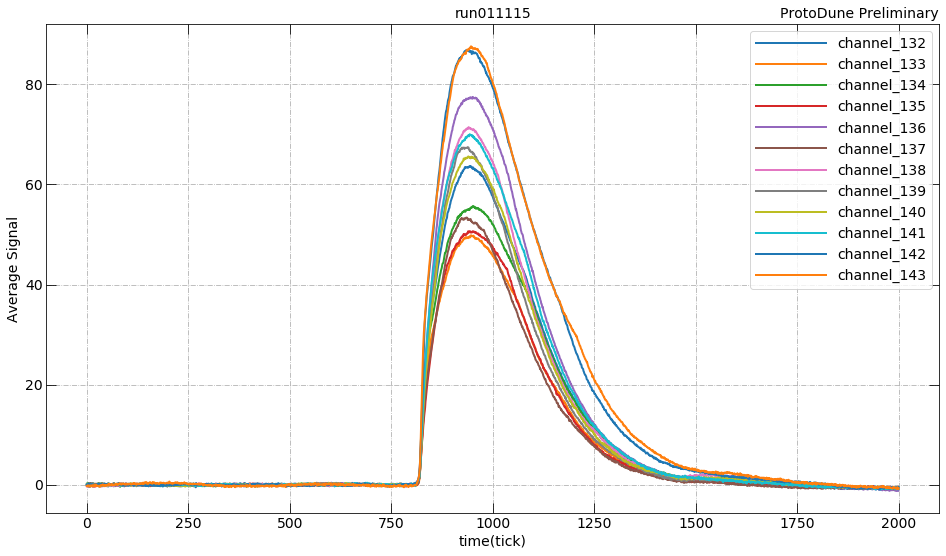

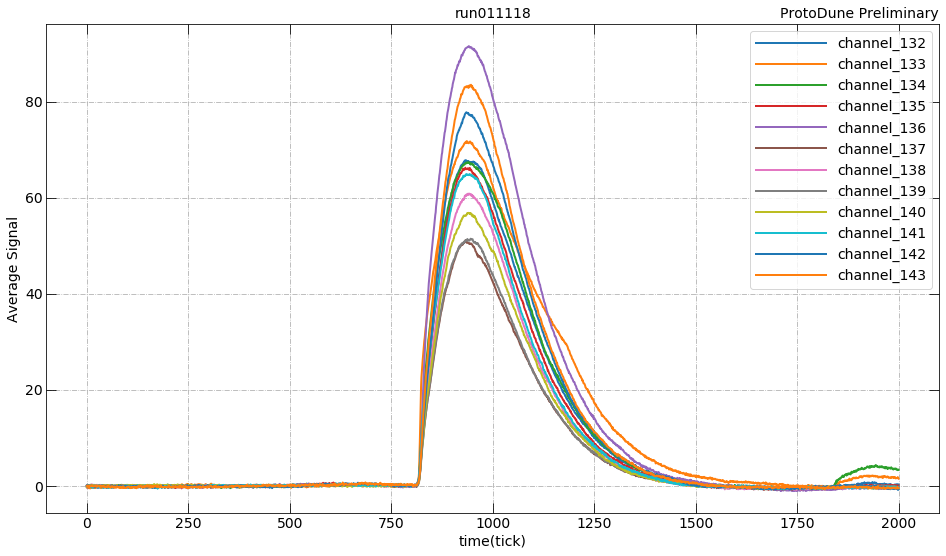

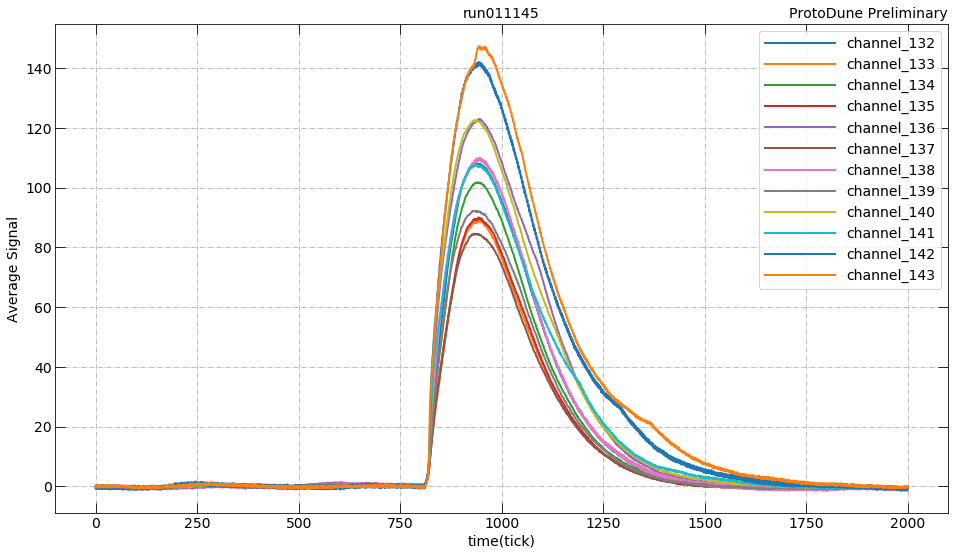

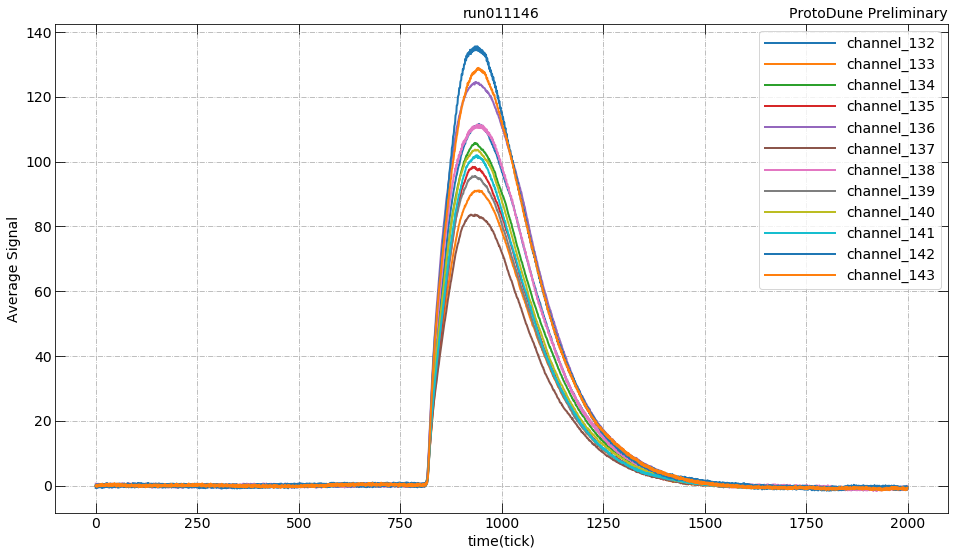

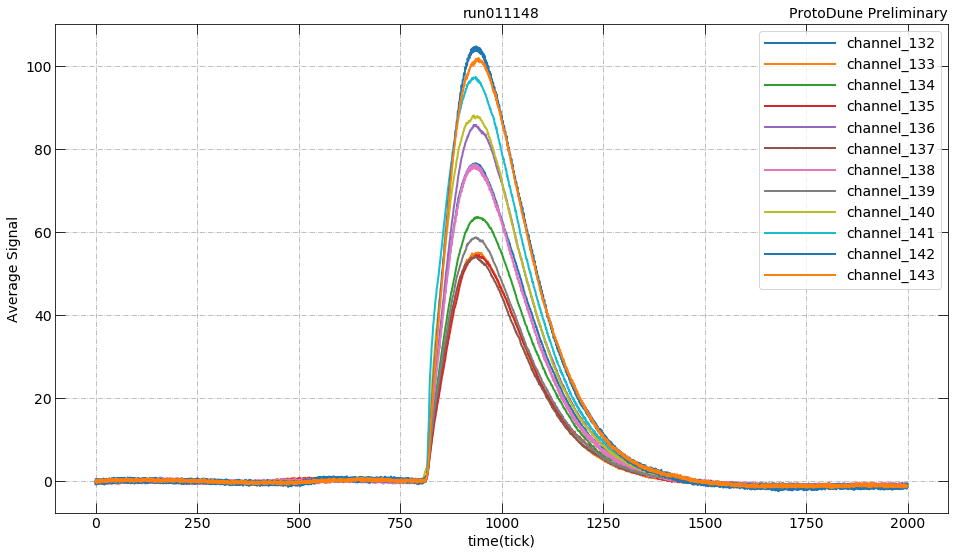

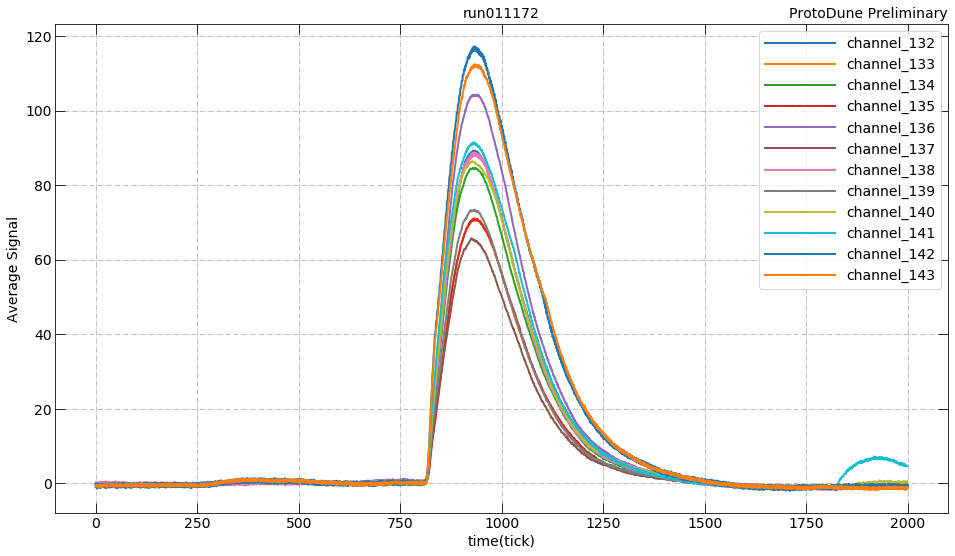

In [7]:
dirname = '/home/furkan/data/tpc/led/test/'
hists={}
allArrays = np.array([])
if not os.path.exists('run_filt'):
    os.makedirs('run_filt')
for filename in sorted(os.listdir(dirname)):
    if '.pkl.gz' in filename:
            #print(filename)
            with gzip.open(dirname+filename,'rb') as fin:
                mydata = pickle.load(fin)
            for key, value in mydata.items():
                baseline = value[0:value.size, 0:750].mean(axis=1)
                #print(arr.size)
                #Nevent = (baseline.size)
                #print('nevent', Nevent)
                blines = baseline.reshape(baseline.size, 1)
                clean = value-blines
                plt.plot(clean.mean(axis=0), label=key, linewidth=2)
            
            plt.title('ProtoDune Preliminary', loc='right')
            plt.title(str(os.path.splitext(filename.split('_0001_dl1_.pkl.gz')[0])[0]))

            plt.grid(True)
            #plt.yscale('log')
            #plt.ylim(-20, 150)

            plt.legend()
            #plt.ylim(0.0001, 100)
            #plt.xlim(350, 1800)
            plt.xlabel('time(tick)')
            plt.ylabel('Average Signal')
            plot_path = os.path.abspath('run_filt') 
            plot_name = str(filename.split('_0001_dl1_.pkl.gz')[0])+'.png'
            plt.savefig(os.path.join(plot_path, plot_name))
            plt.show() 

In [ ]:
mask=np.array([True, True, False,])
print(mask)
a[mask,:] 